In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [2]:
os.chdir(r'C:\Users\c2098580\OneDrive - Cardiff University\Documents\MSc Data Science and Analytics/Dissertation/clean_data')
# read data
vas_df = pd.read_csv('vas_df.csv')

# Data preprocessing

In [3]:
for i in vas_df.columns:
    print(vas_df[i].value_counts())


256    1
255    1
94     1
93     1
92     1
      ..
166    1
165    1
164    1
163    1
1      1
Name: Unnamed: 0, Length: 256, dtype: int64
1    217
4     37
8      2
Name: Number.of.Procedures, dtype: int64
1.5     9
2.7     9
1.3     8
3.3     8
4.1     7
       ..
34.6    1
9.4     1
18.9    1
84.4    1
12.5    1
Name: Pre.op.PPOSSUM.mortality, Length: 141, dtype: int64
0       9
350     4
1361    4
1735    4
1486    3
       ..
1430    1
919     1
150     1
1703    1
1164    1
Name: WIMD.2019.Rank, Length: 178, dtype: int64
97     11
89     10
106     9
120     9
118     8
       ..
128     1
125     1
124     1
160     1
166     1
Name: Hb.closest.to.discharge.death, Length: 70, dtype: int64
2    113
3     89
4     28
1     25
5      1
Name: ASA.score, dtype: int64
2    119
3     53
4     47
1     37
Name: Pre.Op.risk.category.1, dtype: int64
60     27
75     25
90     25
70     25
80     22
50     19
85     15
40     14
95     11
45     10
35      9
65      9
100     9
30     

In [4]:
# drop Unnamed column
vas_df = vas_df.drop('Unnamed: 0',axis=1)

In [5]:
#remove NANs
vas_df = vas_df.dropna(axis=0) 

In [6]:
# create arrays for the features and the target variable 
y = vas_df['VAS']

# selected features 
X = vas_df.drop('VAS',axis=1)

print('Shape of X data:',X.shape)
print('Shape of y data:',y.shape)

Shape of X data: (256, 77)
Shape of y data: (256,)


# Model

In [7]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 204, Test set:52
Fold:2, Train set: 205, Test set:51
Fold:3, Train set: 205, Test set:51
Fold:4, Train set: 205, Test set:51
Fold:5, Train set: 205, Test set:51


In [8]:
def rmse(score):
    rmse = np.sqrt(abs(score))
    return rmse

## Linear regression

In [9]:
max_iter = [500,1000,3000,5000]
results,names,stad = [],[],[]
for passes in max_iter:
    # create pipeline to scale data 
    model = SGDRegressor(max_iter=passes, tol=1e-3)
    pca =  PCA()
    model = Pipeline(steps=[("scaling", StandardScaler()),('pca', pca),("model", model)])
    score = cross_val_score(model, X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max iterations: {passes}')
    print(f'rmse= {"{:.2f}".format(rmse(score.mean()))}')
    results.append(rmse(score.mean()))
    stad.append(rmse(score.std()))
    names.append(passes)

For max iterations: 500
rmse= 25.20
For max iterations: 1000
rmse= 25.15
For max iterations: 3000
rmse= 25.10
For max iterations: 5000
rmse= 24.96


In [10]:
model_name = pd.DataFrame([str(x) for x in names], columns=['max_iterations'])
RMSE = pd.DataFrame(results,columns=['RMSE'])
sd = pd.DataFrame(stad,columns=['std'])

#store results
results = pd.concat([model_name, RMSE,sd], axis=1, join="inner")
# find best accuracy
print(results.sort_values('RMSE',ascending=True).iloc[0,:])

max_iterations       5000
RMSE              24.9637
std               10.2492
Name: 3, dtype: object


## Decision tree

In [11]:
max_depth = [1,2,3,4,5,6,7,8,9,10]
results,names,stad = [],[],[]
for val in max_depth:
    # create pipeline to scale data 
    model = DecisionTreeRegressor(max_depth= val, random_state= 37)
    pca =  PCA()
    model = Pipeline(steps=[("scaling", StandardScaler()),('pca', pca),("model", model)])
    score = cross_val_score(model, X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    print(f'rmse= {"{:.2f}".format(rmse(score.mean()))}')
    results.append(rmse(score.mean()))
    stad.append(rmse(score.std()))
    names.append(val)

For max depth: 1
rmse= 22.32
For max depth: 2
rmse= 22.43
For max depth: 3
rmse= 24.24
For max depth: 4
rmse= 25.42
For max depth: 5
rmse= 28.04
For max depth: 6
rmse= 29.92
For max depth: 7
rmse= 30.55
For max depth: 8
rmse= 31.45
For max depth: 9
rmse= 32.09
For max depth: 10
rmse= 31.98


In [12]:
model_name = pd.DataFrame([str(x) for x in names], columns=['max_depth'])
RMSE = pd.DataFrame(results,columns=['RMSE'])
sd = pd.DataFrame(stad,columns=['std'])

#store results
results = pd.concat([model_name, RMSE,sd], axis=1, join="inner")
# find best accuracy
print(results.sort_values('RMSE',ascending=True).iloc[0,:])

max_depth          1
RMSE         22.3238
std          10.7681
Name: 0, dtype: object


## Random forest

In [13]:
estimators = [100, 250, 400, 500,1000,2000]
results,names, stad = [],[],[]

for count in estimators:
    # create pipeline to scale data 
    model = RandomForestRegressor(n_estimators= count, random_state= 6)
    pca =  PCA()
    model = Pipeline(steps=[("scaling", StandardScaler()),('pca', pca),("model", model)])
    score = cross_val_score(model, X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    print(f'rmse= {"{:.2f}".format(rmse(score.mean()))}')
    results.append(rmse(score.mean()))
    stad.append(rmse(score.std()))
    names.append(count)

For estimators: 100
rmse= 21.82
For estimators: 250
rmse= 21.74
For estimators: 400
rmse= 21.73
For estimators: 500
rmse= 21.70
For estimators: 1000
rmse= 21.66
For estimators: 2000
rmse= 21.64


In [14]:
model_name = pd.DataFrame([str(x) for x in names], columns=['estimators'])
RMSE = pd.DataFrame(results,columns=['RMSE'])
sd = pd.DataFrame(stad,columns=['std'])

#store results
results = pd.concat([model_name, RMSE,sd], axis=1, join="inner")
# find best accuracy
print(results.sort_values('RMSE',ascending=True).iloc[0,:])

estimators       2000
RMSE          21.6421
std           9.89483
Name: 5, dtype: object


# Result (best model)

Random forest with estimators = 1000

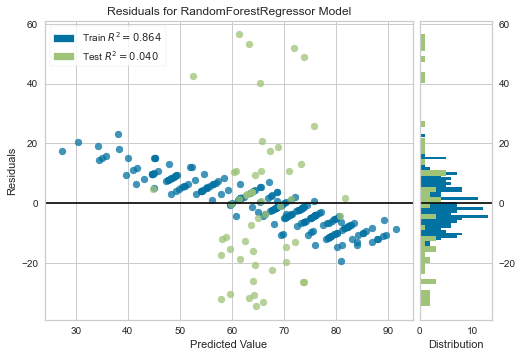

In [17]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import residuals_plot


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
pca =  PCA()
model = RandomForestRegressor(n_estimators= 2000, random_state= 2)
model = Pipeline(steps=[("scaling", StandardScaler()),('pca', pca),("model", model)])

# Create the visualizer, fit, score, and show it
viz = residuals_plot(model, X_train, y_train, X_test, y_test)

In [18]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
from keras import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse 

model.fit(X_train,y_train)
y_predict = model.predict(X_test)

# evaluate 
print("Mean Absolute Error (MAE): {}".format(mean_absolute_error(y_test, y_predict)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_predict)))
print("Root Mean Squared Error (RMSE): {}".format(rmse(y_test, y_predict)))
print("Mean Absolute Perc. Error (MAPE): {}".format(np.mean(np.abs((y_test - y_predict) / y_test)) * 100))
print('\n')


Mean Absolute Error (MAE): 18.253625
Mean Squared Error (MSE): 550.8702929951924
Root Mean Squared Error (RMSE): 23.470626173904954
Mean Absolute Perc. Error (MAPE): 68.9813107908767


